#**K-Means clustering 알고리즘**

비지도학습으로 데이터에 레이블이 없는 데이터셋을 다룸. 군집화의 목표는 서로 유사한 데이터들은 같은 그룹으로, 서로 유사하지 않은 데이터는 다른 그룹으로 분리하는 것.

**적용 분야**
* 고객 세분화
* 추천 시스템
* 검색 엔진

**K-Means 알고리즘 원리**
* **Step1.** 초기점(k) 설정: 임의의 초기 중심점(centroid)을 k수 만큼 생성 
* **Step2.** 그룹(cluster) 부여: k개의 중심점과 개별 데이터(Xi)간의 거리를 측정여 그룹 부여
* **Step3.** 중심점 업데이트: 그룹 안의 데이터들이 새로운 중심점을 찾음
* **Step4.** 그룹 안의 데이터들이 변경되고 다시 새로운 줌심점을 찾음 **[변화가 없을때까지 반복]**

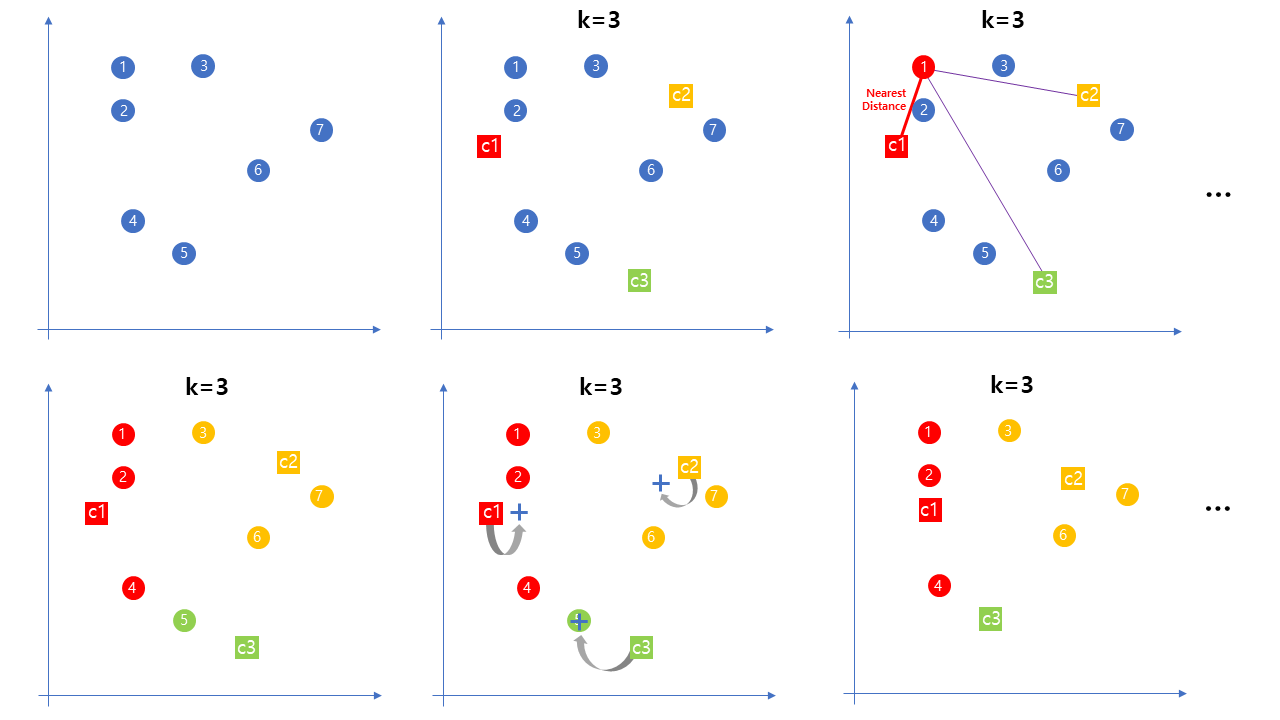

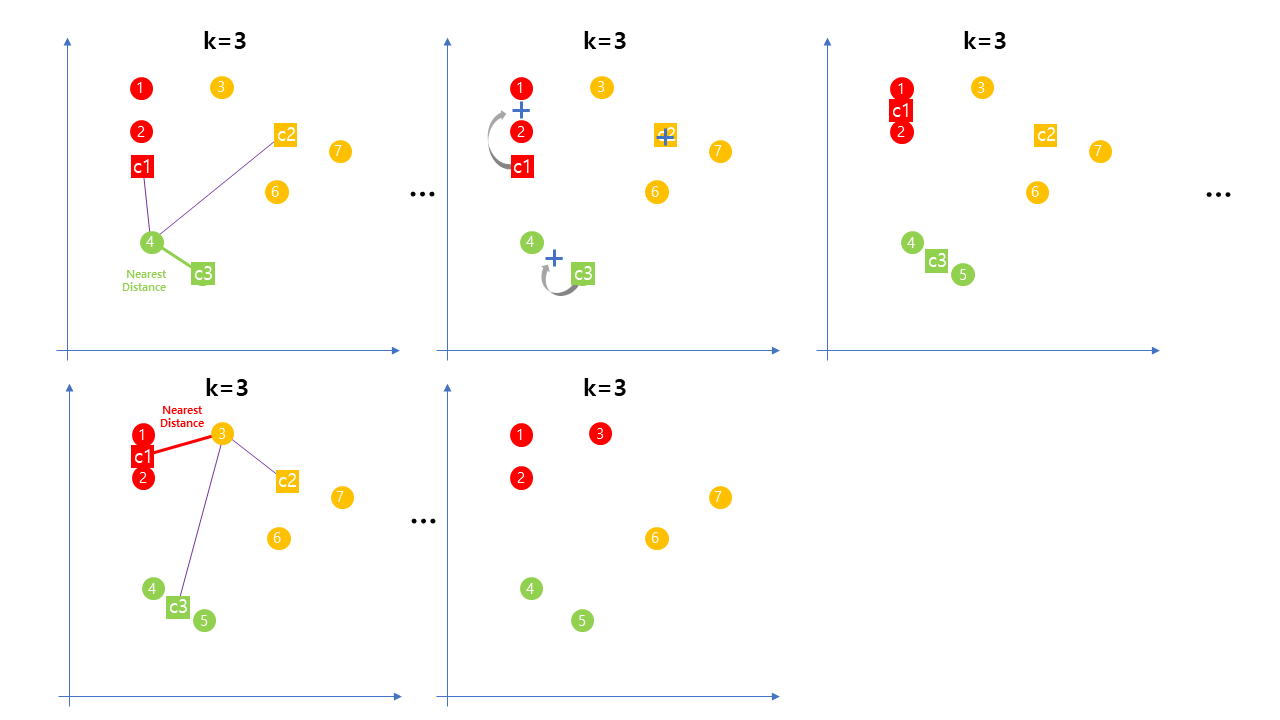

**Optimization Function**

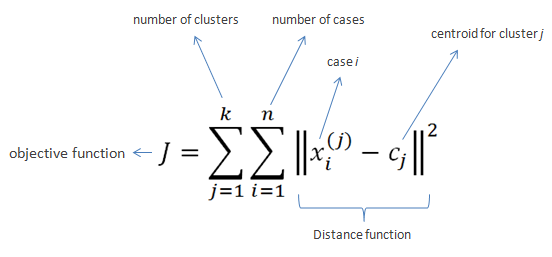

**이슈**: 전통적인 K-Means의 문제, 초기점(초기 중심점) 무작위 선정의 문제 K-Means++

# **군집분석 : 타깃마케팅을 위한 K-means 군집화**

**RFM**은 가치있는 고객을 추출해내어 이를 기준으로 고객을 분류할 수 있는 매우 간단하면서도 유용하게 사용될 수 있는 방법으로 알려져 있어 마케팅에서 가장 많이 사용되고 있는 분석방법 중 하나이다. RFM은 구매 가능성이 높은 고객을 선정하기 위한 데이터 분석방법으로서, 분석과정을 통해 데이터는 의미있는 정보로 전환된다.

**RFM**은 **Recency, Frequency, Monetar**y의 약자로 고객의 가치를 다음의 세 가지 기준에 의해 계산하고 있다.

Recency - 거래의 최근성: 고객이 얼마나 최근에 구입했는가?</br>
Frequency - 거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나?</br>
Monetary - 거래규모: 고객이 구입했던 총 금액은 어느 정도인가?</br>

##**데이터 전처리**

### **1) 데이터 수집**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings

warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
retail_df = pd.read_excel('/content/drive/MyDrive/DataScience/DataFile/Online_Retail.xlsx')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


InvoiceNo: 송장번호, 'C'로 시작하는 것은 취소 주문</br>
StockCode:	제품 고유의 제품 품목</br>
Description: 제품 설명</br>
Quantity: 주문 수량</br>
InvoiceDate: 주문날짜와 시간</br>
UnitPrice: 제품 단가(파운드)</br>
CustomerID:고객번호</br>
Country:주문 고객의 국적</br>



In [4]:
temp_df = retail_df.copy()

### **2) 데이터 준비 및 탐색**

In [5]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
temp_df.shape

(541909, 8)

In [7]:
temp_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
temp_df = retail_df.dropna()

In [9]:
temp_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**일일 판매량 및 매출액 그래프**
* 날짜만 출력: temp_df['InvoiceDate'].dt.date



In [10]:
temp_df['newDate'] = temp_df['InvoiceDate'].dt.date

In [11]:
temp_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09


In [12]:
daily_date = temp_df.groupby('newDate')[['InvoiceNo']].count()

In [13]:
daily_date

,InvoiceNo
newDate,
2010-12-01,1968
2010-12-02,2044
2010-12-03,1117
2010-12-05,2724
2010-12-06,1974
...,...
2011-12-05,3398
2011-12-06,2654
2011-12-07,2196


In [14]:
daily_date = daily_date.reset_index()

In [15]:
daily_date

,newDate,InvoiceNo
0,2010-12-01,1968
1,2010-12-02,2044
2,2010-12-03,1117
3,2010-12-05,2724
4,2010-12-06,1974
...,...,...
300,2011-12-05,3398
301,2011-12-06,2654
302,2011-12-07,2196
303,2011-12-08,2599


* 일일 판매량 그래프

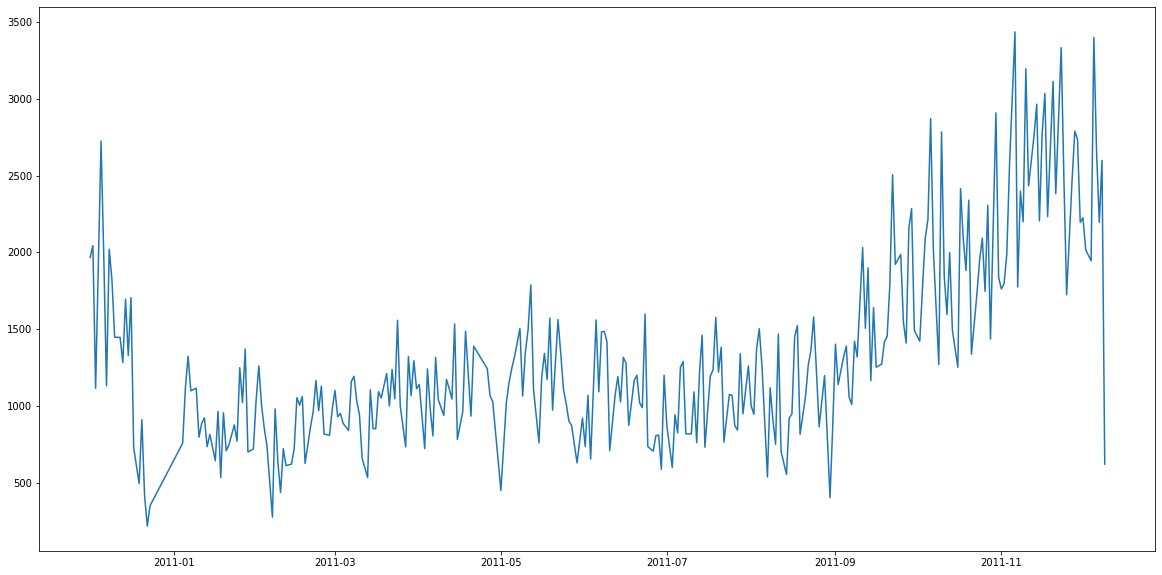

In [16]:
plt.figure(figsize=(20, 10))
x = daily_date['newDate'] 
y = daily_date['InvoiceNo']
plt.plot(x, y)
plt.show()

* 일일 매출액 그래프

In [17]:
temp_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [18]:
temp_df['Amount'] = temp_df['Quantity']*temp_df['UnitPrice']

In [19]:
temp_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,newDate,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,16.60


In [20]:
temp_amount_df = temp_df.groupby('newDate')[['Amount']].sum()

In [21]:
temp_amount_df

,Amount
newDate,
2010-12-01,46051.26
2010-12-02,45775.43
2010-12-03,22598.46
2010-12-05,31380.60
2010-12-06,30465.08
...,...
2011-12-05,56634.53
2011-12-06,43659.20
2011-12-07,68991.27


In [ ]:
temp_amount_df.reset_index(inplace=True)

In [ ]:
temp_amount_df

,newDate,Amount
0,2010-12-01,46051.26
1,2010-12-02,45775.43
2,2010-12-03,22598.46
3,2010-12-05,31380.60
4,2010-12-06,30465.08
...,...,...
300,2011-12-05,56634.53
301,2011-12-06,43659.20
302,2011-12-07,68991.27
303,2011-12-08,49442.19


In [ ]:
temp_amount_df.drop('newDate', axis=1, inplace=True)

In [ ]:
daily_date

,newDate,InvoiceNo
0,2010-12-01,1968
1,2010-12-02,2044
2,2010-12-03,1117
3,2010-12-05,2724
4,2010-12-06,1974
...,...,...
300,2011-12-05,3398
301,2011-12-06,2654
302,2011-12-07,2196
303,2011-12-08,2599


In [ ]:
daily_date = pd.concat([daily_date, temp_amount_df], axis=1)

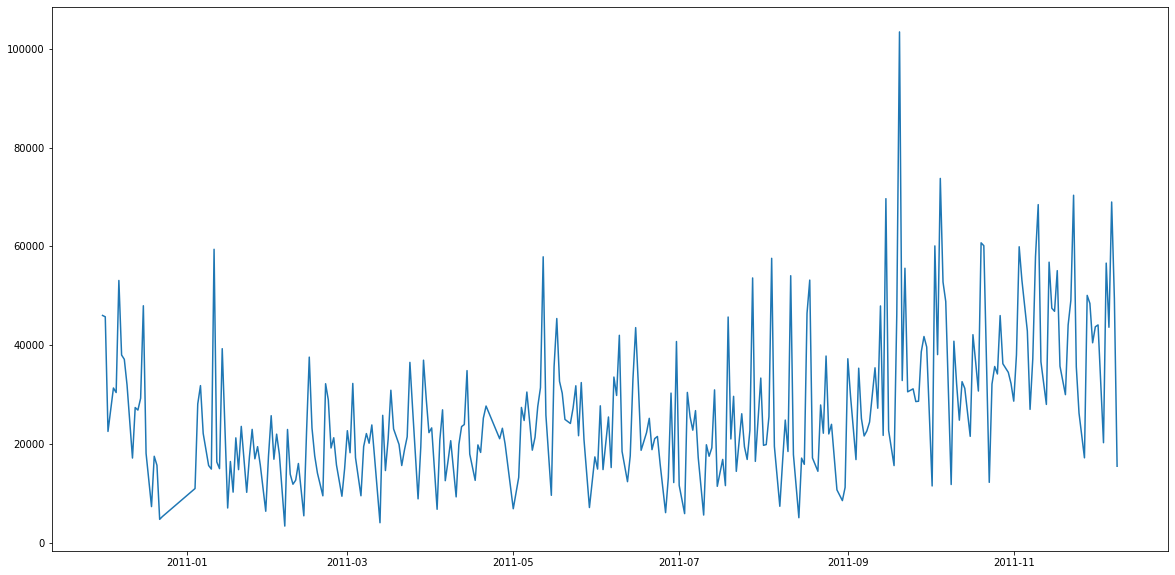

In [ ]:
plt.figure(figsize=(20, 10))
x = daily_date['newDate'] 
y = daily_date['Amount']
plt.plot(x, y)
#y1 = daily_date['InvoiceNo']
#plt.plot(x, y1)
plt.show()

### **3) Customer 기반 RFM Dataset 생성**

**Monetary data** (total of all the transactions of a customer)</br>
거래규모: 고객이 구입했던 총 금액은 어느 정도인가?</br>

In [ ]:
temp_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
newDate        0
Amount         0
dtype: int64

In [22]:
df = temp_df.groupby('CustomerID')[['Amount']].sum()

In [23]:
df.isna().sum()

Amount    0
dtype: int64

In [24]:
df

,Amount
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


**Frequency Data**</br>
거래빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했나?</br>

In [25]:
df['Frequency'] = retail_df.groupby('CustomerID')[['InvoiceNo']].count()

In [26]:
df

,Amount,Frequency
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17
...,...,...
18280.0,180.60,10
18281.0,80.82,7
18282.0,176.60,13


In [27]:
df = df.rename(columns={'Amount': 'Monetary'})

In [28]:
df

,Monetary,Frequency
CustomerID,,
12346.0,0.00,2
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17
...,...,...
18280.0,180.60,10
18281.0,80.82,7
18282.0,176.60,13


In [29]:
df.isna().sum()

Monetary     0
Frequency    0
dtype: int64

**Recency**</br>
거래의 최근성: 고객이 얼마나 최근에 구입했는가?</br>

In [30]:
import datetime

In [31]:
temp_df['newDate'].max()

datetime.date(2011, 12, 9)

In [32]:
df['Date'] =  temp_df.groupby('CustomerID')[['newDate']].max()

In [33]:
df

,Monetary,Frequency,Date
CustomerID,,,
12346.0,0.00,2,2011-01-18
12347.0,4310.00,182,2011-12-07
12348.0,1797.24,31,2011-09-25
12349.0,1757.55,73,2011-11-21
12350.0,334.40,17,2011-02-02
...,...,...,...
18280.0,180.60,10,2011-03-07
18281.0,80.82,7,2011-06-12
18282.0,176.60,13,2011-12-02


In [34]:
df['Days'] = datetime.date(2011, 12, 9) - df['Date']

In [35]:
df

,Monetary,Frequency,Date,Days
CustomerID,,,,
12346.0,0.00,2,2011-01-18,325 days
12347.0,4310.00,182,2011-12-07,2 days
12348.0,1797.24,31,2011-09-25,75 days
12349.0,1757.55,73,2011-11-21,18 days
12350.0,334.40,17,2011-02-02,310 days
...,...,...,...,...
18280.0,180.60,10,2011-03-07,277 days
18281.0,80.82,7,2011-06-12,180 days
18282.0,176.60,13,2011-12-02,7 days


In [36]:
df['Recency'] = df['Days'].dt.days

In [37]:
df

,Monetary,Frequency,Date,Days,Recency
CustomerID,,,,,
12346.0,0.00,2,2011-01-18,325 days,325
12347.0,4310.00,182,2011-12-07,2 days,2
12348.0,1797.24,31,2011-09-25,75 days,75
12349.0,1757.55,73,2011-11-21,18 days,18
12350.0,334.40,17,2011-02-02,310 days,310
...,...,...,...,...,...
18280.0,180.60,10,2011-03-07,277 days,277
18281.0,80.82,7,2011-06-12,180 days,180
18282.0,176.60,13,2011-12-02,7 days,7


In [38]:
df.drop(columns=['Date', 'Days'], axis=1, inplace=True)

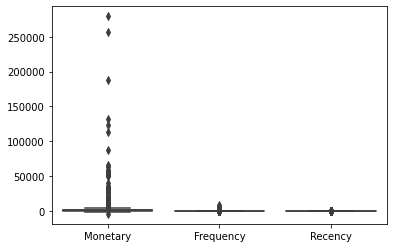

In [39]:
sns.boxplot(data = df)

###**표준화**

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaled_df = scaler.fit_transform(df)

In [43]:
scaled_df

array([[-0.23100099, -0.3917197 ,  2.31656788],
       [ 0.29343167,  0.38265697, -0.88904975],
       [-0.01231622, -0.26695902, -0.16456032],
       ...,
       [-0.20951263, -0.34439668, -0.83942719],
       [ 0.02390005,  2.85205812, -0.87912524],
       [-0.00744423, -0.0991774 , -0.49206924]])

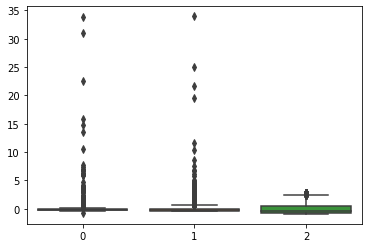

In [45]:
sns.boxplot(data=scaled_df)

## **Clustering: K-Means**

In [46]:
from sklearn.cluster import KMeans
kmeans =  KMeans(n_clusters = 5, random_state = 1000) # 클러스터의 개수?
df['seg_km'] = kmeans.fit(scaled_df)

In [47]:
df['seg_km'] = kmeans.predict(scaled_df)
df

,Monetary,Frequency,Recency,seg_km
CustomerID,,,,
12346.0,0.00,2,325,1
12347.0,4310.00,182,2,0
12348.0,1797.24,31,75,0
12349.0,1757.55,73,18,0
12350.0,334.40,17,310,1
...,...,...,...,...
18280.0,180.60,10,277,1
18281.0,80.82,7,180,1
18282.0,176.60,13,7,0


In [48]:
df['seg_km'].value_counts()

0    3051
1    1071
4     241
2       5
3       4
Name: seg_km, dtype: int64

In [49]:
df.groupby('seg_km')[['Monetary',	'Frequency',	'Recency']].mean()

,Monetary,Frequency,Recency
seg_km,,,
0,1299.214504,74.561455,42.799738
1,466.733428,27.695612,249.212885
2,192103.854000,1013.400000,8.400000
3,64776.602500,5914.000000,1.500000
4,10857.531867,501.896266,11.850622


Text(0, 0.5, 'Recency')

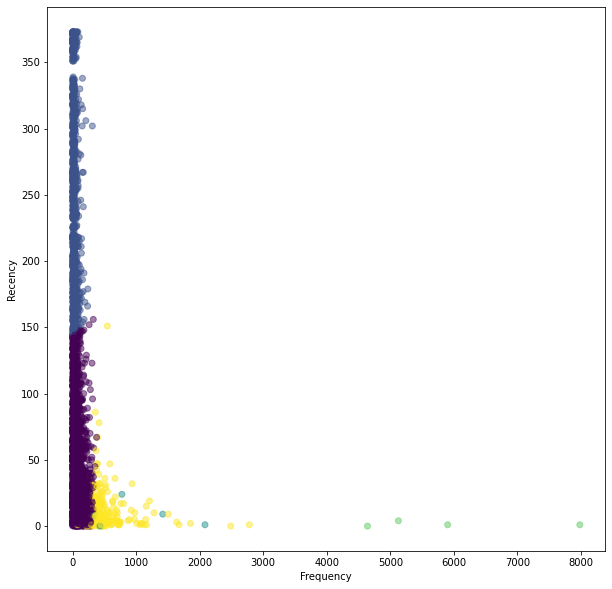

In [50]:
x = df['Frequency']
y = df['Recency']
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c = df['seg_km'], alpha = 0.5)
plt.xlabel('Frequency')
plt.ylabel('Recency')

Text(0, 0.5, 'Recency')

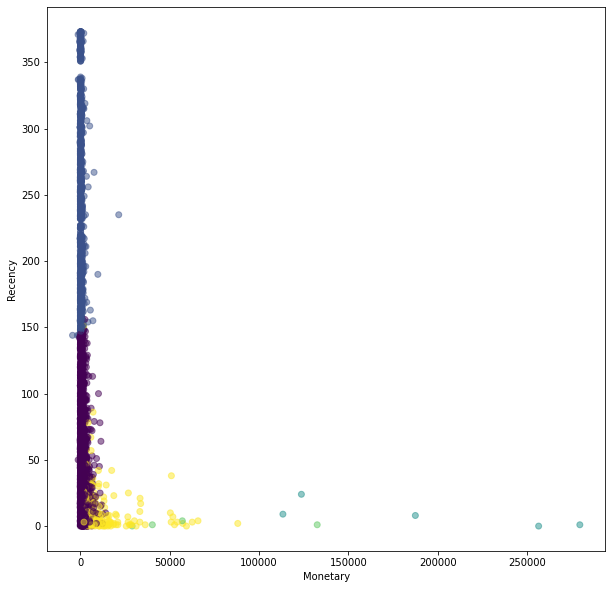

In [51]:
x = df['Monetary']
y = df['Recency']
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c = df['seg_km'], alpha = 0.5)
plt.xlabel('Monetary')
plt.ylabel('Recency')

In [52]:
df['seg_km'].value_counts()

0    3051
1    1071
4     241
2       5
3       4
Name: seg_km, dtype: int64

## **Clustering 최적화**

In [53]:
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 1234)
    kmeans.fit(scaled_df)
    distortions.append(kmeans.inertia_)

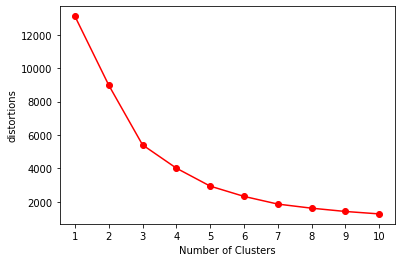

In [54]:
plt.plot(range(1, 11), distortions, 'ro-')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("distortions")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
segment = kmeans.fit_predict(scaled_df)

In [ ]:
df['Clustering'] = segment
df

In [ ]:
df['Clustering'].value_counts()

0    1318
1    1212
2     966
3     876
Name: Clustering, dtype: int64

In [ ]:
df.groupby('Clustering')[['Monetary',	'Frequency',	'Recency']].median()

## **평가 및 시각화**

**실루엣 계수(Silhouette Coefficient):**</br>

 

각 데이터 포인트와 주위 데이터 포인트들과의 거리 계산을 통해 값을 구하며,

군집 안에 있는 데이터들은 잘 모여있는지, 군집끼리는 서로 잘 구분되는지 클러스터링을 평가하는 척도로 활용된다.

* 실루엣 계수의 평균값이 1에 가까울수록 군집화가 잘 되었다고 생각할 수 있다.</br>  

* 각 클러스터 내의 데이터 포인트들의 실루엣 계수 평균값을 구하여, 각 클러스터별 평균값도 구할 수 있다. 1에 가까운 평균값을 가지는 클러스터는 'clear-cut' 클러스터, 0에 가까운 값을 가지는 클러스터는 'weak' 클러스터로 표현된다.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 1234)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**Boxplot 시각화**

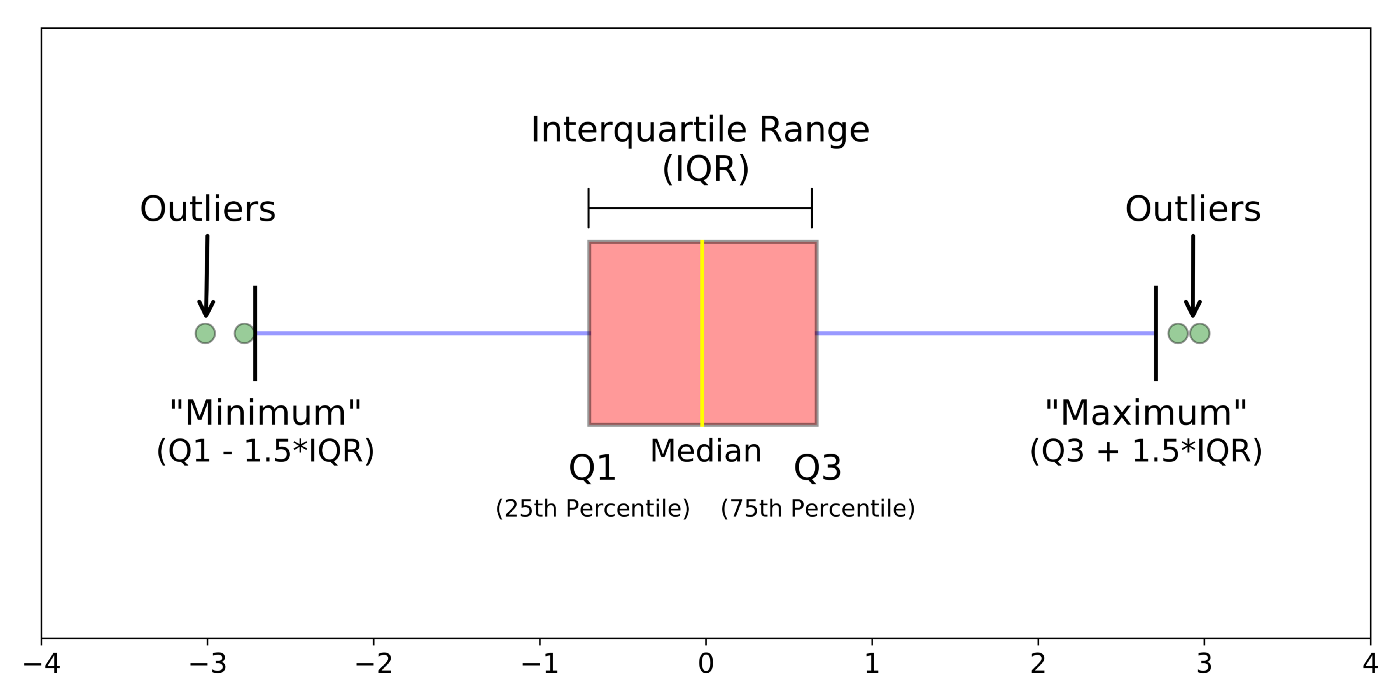

In [ ]:
sns.boxplot(x=df['Clustering'], y=df['Monetary'], data=df)

In [ ]:
sns.boxplot(x=df['Clustering'], y=df['Recency'], data=df)

In [ ]:
sns.boxplot(x=df['Clustering'], y=df['Frequency'], data=df)